In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/성공적인 마케팅 train.csv')

In [ ]:
df=data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780502 entries, 0 to 780501
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_id     780502 non-null  object 
 1   product_id   780502 non-null  object 
 2   description  780502 non-null  object 
 3   quantity     780502 non-null  int64  
 4   order_date   780502 non-null  object 
 5   price        780502 non-null  float64
 6   customer_id  780502 non-null  int64  
 7   country      780502 non-null  object 
 8   total        780502 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 53.6+ MB


In [ ]:
print(df.isna().sum())

order_id       0
product_id     0
description    0
quantity       0
order_date     0
price          0
customer_id    0
country        0
total          0
dtype: int64


In [ ]:
df.describe()

,quantity,price,customer_id,total
count,780502.000000,780502.000000,780502.000000,780502.000000
mean,12.623307,6.140931,15313.393466,33.715373
std,143.906302,119.042266,1695.765797,274.207403
min,-74215.000000,0.000000,12346.000000,-127352.940000
25%,2.000000,2.062500,13963.000000,7.260000
50%,5.000000,3.217500,15239.000000,19.470000
75%,12.000000,6.187500,16788.000000,32.175000
max,74215.000000,64300.500000,18287.000000,127352.940000


1. Customer_id 와 total, qunatity, price를 groupby하고 새로운 결과를 도출하시오. (코드 및 figure까지)

groupby() :집단, 그룹별로 데이터를 집계,요약하는 방법 

In [ ]:
df.groupby('customer_id').sum().reset_index()

,customer_id,quantity,price,total
0,12346,53,936.3750,-85.3710
1,12347,2775,892.6995,7749.5715
2,12348,2714,318.6150,3332.0100
3,12349,1619,2482.5735,7267.4910
4,12350,197,107.7450,551.7600
...,...,...,...,...
5909,18283,1537,2617.2630,4053.8850
5910,18284,493,191.5485,720.5220
5911,18285,145,165.3300,704.5500
5912,18286,592,505.8075,1960.9095


In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

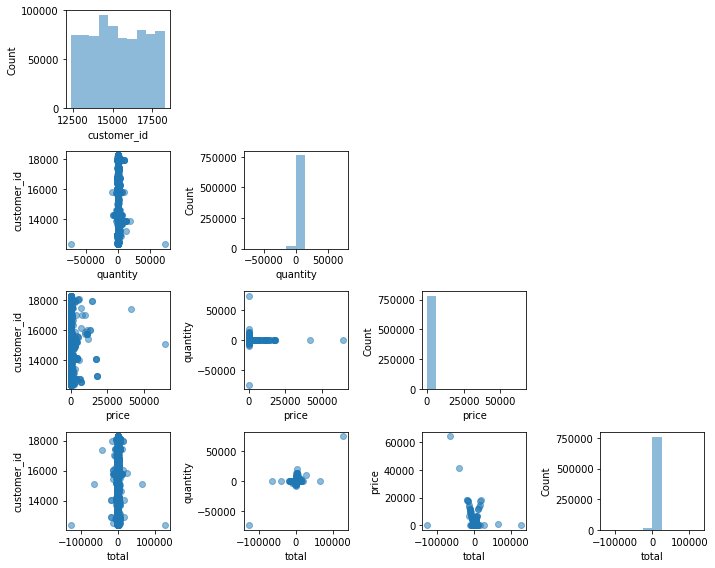

In [ ]:
# 4개의 변수들간의 산점도를 그렸습니다. 이상치를 확인 가능
cols= ['customer_id','quantity','price','total']
scatterplotmatrix(df[cols].values,figsize=(10,8),names=cols,alpha=0.5)
plt.tight_layout()
plt.show()

2. 문자열에 대한 인코딩을 하여서 제출하시오.(코드 및 결과까지)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 문자열 데이터인 country, product_id, order_id, description 들을 라벨인코딩을 하였습니다.
encoder = LabelEncoder()
encoder.fit(df['country'])
labels = encoder.transform(df['country'])
df['country']= encoder.transform(df['country'])

In [ ]:
encoder.fit(df['product_id'])
labels = encoder.transform(df['product_id'])
df['product_id']= encoder.transform(df['product_id'])

In [ ]:
encoder.fit(df['order_id'])
labels = encoder.transform(df['order_id'])
df['order_id']= encoder.transform(df['order_id'])

In [ ]:
encoder.fit(df['description'])
labels = encoder.transform(df['description'])
df['description']= encoder.transform(df['description'])

In [ ]:
df

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
0,0,4021,61,12,2009-12-01 07:45:00,11.4675,13085,38,137.6100
1,0,3336,3296,12,2009-12-01 07:45:00,11.1375,13085,38,133.6500
2,0,3338,36,12,2009-12-01 07:45:00,11.1375,13085,38,133.6500
3,0,1261,3627,48,2009-12-01 07:45:00,3.4650,13085,38,166.3200
4,0,620,4623,24,2009-12-01 07:45:00,2.0625,13085,38,49.5000
...,...,...,...,...,...,...,...,...,...
780497,43953,1413,3536,-1,2011-11-30 17:39:00,1.4025,15676,38,-1.4025
780498,43953,2312,4796,-1,2011-11-30 17:39:00,5.4285,15676,38,-5.4285
780499,43954,3898,260,-1,2011-11-30 17:42:00,2.0625,16717,38,-2.0625
780500,43954,4021,61,-1,2011-11-30 17:42:00,13.1175,16717,38,-13.1175


---------------------------

구매자 한 사람의 total을 합치는 법

In [ ]:
# order_date에서 년도-월 추출
df['year_month'] = df['order_date'].str[:7]

In [ ]:
df=df.drop(['order_id','product_id','description','quantity','order_date','price','country'],axis=1)

In [ ]:
pivot = pd.pivot_table(df, values="total", index=["customer_id"], columns=["year_month"], aggfunc=np.sum)

In [ ]:
df= pivot.cumsum()

In [ ]:
df = df.fillna(0)
df

year_month,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
customer_id,,,,,,,,,,,,,,,,,,,,,,,,
12346,1.872750e+02,-22.275,0.0000,4.463250e+01,0.000,0.0000,-285.9285,0.0,0.000,0.000000e+00,-9.075000e+00,0.000000e+00,0.0000,0.0000,0.0000,0.0,0.00000,0.000000e+00,0.000,0.00000,0.0000,0.000000e+00,0.000,0.000000e+00
12347,0.000000e+00,0.000,0.0000,0.000000e+00,0.000,0.0000,0.0000,0.0,0.000,0.000000e+00,9.999495e+02,0.000000e+00,1174.4535,784.3935,0.0000,0.0,1049.81250,0.000000e+00,631.158,0.00000,965.1015,0.000000e+00,2135.628,0.000000e+00
12348,0.000000e+00,0.000,0.0000,0.000000e+00,0.000,0.0000,0.0000,0.0,0.000,3.665640e+02,0.000000e+00,0.000000e+00,2647.5735,1159.6695,0.0000,0.0,1655.36250,0.000000e+00,0.000,0.00000,0.0000,5.115000e+02,0.000,0.000000e+00
12349,1.474275e+02,0.000,0.0000,0.000000e+00,1763.058,330.0000,0.0000,0.0,0.000,0.000000e+00,3.314272e+03,0.000000e+00,0.0000,0.0000,0.0000,0.0,0.00000,0.000000e+00,0.000,0.00000,0.0000,0.000000e+00,0.000,2.899958e+03
12350,0.000000e+00,0.000,0.0000,0.000000e+00,0.000,0.0000,0.0000,0.0,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.0000,0.0000,551.7600,0.0,0.00000,0.000000e+00,0.000,0.00000,0.0000,0.000000e+00,0.000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,0.000000e+00,0.000,803829.5529,1.045142e+06,0.000,0.0000,0.0000,0.0,964302.867,0.000000e+00,0.000000e+00,1.862262e+06,0.0000,781657.6350,718631.2155,0.0,701617.40715,1.066307e+06,1001323.158,945635.32965,0.0000,1.533438e+06,1604186.727,1.859245e+06
18284,0.000000e+00,0.000,0.0000,0.000000e+00,0.000,0.0000,0.0000,0.0,0.000,0.000000e+00,1.586509e+06,0.000000e+00,0.0000,0.0000,0.0000,0.0,0.00000,0.000000e+00,0.000,0.00000,0.0000,0.000000e+00,0.000,0.000000e+00
18285,0.000000e+00,0.000,804534.1029,0.000000e+00,0.000,0.0000,0.0000,0.0,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.0000,0.0000,0.0000,0.0,0.00000,0.000000e+00,0.000,0.00000,0.0000,0.000000e+00,0.000,0.000000e+00


In [ ]:
# total 값 범주화
# total값이 300 이상이면 1, 300 미만이면 0

df.loc[df['2009-12'] >= 300, '09-12'] = 1
df.loc[df['2009-12'] < 300, '09-12'] = 0
df.loc[df['2010-01'] >= 300, '10-01'] = 1
df.loc[df['2010-01'] < 300, '10-01'] = 0
df.loc[df['2010-02'] >= 300, '10-02'] = 1
df.loc[df['2010-02'] < 300, '10-02'] = 0
df.loc[df['2010-03'] >= 300, '10-03'] = 1
df.loc[df['2010-03'] < 300, '10-03'] = 0
df.loc[df['2010-04'] >= 300, '10-04'] = 1
df.loc[df['2010-04'] < 300, '10-04'] = 0
df.loc[df['2010-05'] >= 300, '10-05'] = 1
df.loc[df['2010-05'] < 300, '10-05'] = 0
df.loc[df['2010-06'] >= 300, '10-06'] = 1
df.loc[df['2010-06'] < 300, '10-06'] = 0
df.loc[df['2010-07'] >= 300, '10-07'] = 1
df.loc[df['2010-07'] < 300, '10-07'] = 0
df.loc[df['2010-08'] >= 300, '10-08'] = 1
df.loc[df['2010-08'] < 300, '10-08'] = 0
df.loc[df['2010-09'] >= 300, '10-09'] = 1
df.loc[df['2010-09'] < 300, '10-09'] = 0
df.loc[df['2010-10'] >= 300, '10-10'] = 1
df.loc[df['2010-10'] < 300, '10-10'] = 0
df.loc[df['2010-11'] >= 300, '10-11'] = 1
df.loc[df['2010-11'] < 300, '10-11'] = 0
df.loc[df['2010-12'] >= 300, '10-12'] = 1
df.loc[df['2010-12'] < 300, '10-12'] = 0
df.loc[df['2011-01'] >= 300, '11-01'] = 1
df.loc[df['2011-01'] < 300, '11-01'] = 0
df.loc[df['2011-02'] >= 300, '11-02'] = 1
df.loc[df['2011-02'] < 300, '11-02'] = 0
df.loc[df['2011-03'] >= 300, '11-03'] = 1
df.loc[df['2011-03'] < 300, '11-03'] = 0
df.loc[df['2011-04'] >= 300, '11-04'] = 1
df.loc[df['2011-04'] < 300, '11-04'] = 0
df.loc[df['2011-05'] >= 300, '11-05'] = 1
df.loc[df['2011-05'] < 300, '11-05'] = 0
df.loc[df['2011-06'] >= 300, '11-06'] = 1
df.loc[df['2011-06'] < 300, '11-06'] = 0
df.loc[df['2011-07'] >= 300, '11-07'] = 1
df.loc[df['2011-07'] < 300, '11-07'] = 0
df.loc[df['2011-08'] >= 300, '11-08'] = 1
df.loc[df['2011-08'] < 300, '11-08'] = 0
df.loc[df['2011-09'] >= 300, '11-09'] = 1
df.loc[df['2011-09'] < 300, '11-09'] = 0
df.loc[df['2011-10'] >= 300, '11-10'] = 1
df.loc[df['2011-10'] < 300, '11-10'] = 0
df.loc[df['2011-11'] >= 300, '11-11'] = 1
df.loc[df['2011-11'] < 300, '11-11'] = 0


In [ ]:
# 범주화 전 변수들 삭제하였습니다.
df=df.drop(['2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11'],axis=1)

In [ ]:
df= df.reset_index()
df

year_month,customer_id,09-12,10-01,10-02,10-03,10-04,10-05,10-06,10-07,10-08,10-09,10-10,10-11,10-12,11-01,11-02,11-03,11-04,11-05,11-06,11-07,11-08,11-09,11-10,11-11
0,12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,12349,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,18283,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
5910,18284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5911,18285,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5912,18286,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


--------------

위에 있는 연도,월 별 total값 사용하기 전 과정

3. 모델을 선택하여 학습을 하고, 정확도,recall,precision을 출력하여서 제출하시오.

In [ ]:
df

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total_bin
0,0,4021,61,12,2009-12-01 07:45:00,11.4675,13085,38,0.0
1,0,3336,3296,12,2009-12-01 07:45:00,11.1375,13085,38,0.0
2,0,3338,36,12,2009-12-01 07:45:00,11.1375,13085,38,0.0
3,0,1261,3627,48,2009-12-01 07:45:00,3.4650,13085,38,0.0
4,0,620,4623,24,2009-12-01 07:45:00,2.0625,13085,38,0.0
...,...,...,...,...,...,...,...,...,...
780497,43953,1413,3536,-1,2011-11-30 17:39:00,1.4025,15676,38,0.0
780498,43953,2312,4796,-1,2011-11-30 17:39:00,5.4285,15676,38,0.0
780499,43954,3898,260,-1,2011-11-30 17:42:00,2.0625,16717,38,0.0
780500,43954,4021,61,-1,2011-11-30 17:42:00,13.1175,16717,38,0.0


In [ ]:
df1=df.copy()

In [ ]:
df1=df1.drop('total_bin',axis=1)

In [ ]:
# order_date를 year과 month 로 추출해줍니다.
df1['year'] = pd.DatetimeIndex(df1['order_date']).year
df1['month'] = pd.DatetimeIndex(df1['order_date']).month

In [ ]:
# order_date를 삭제해줍니다.
df1=df1.drop('order_date',axis=1)

In [ ]:
# 종속변수인 total을 제외한 나머지 변수들
df1

,order_id,product_id,description,quantity,price,customer_id,country,year,month
0,0,4021,61,12,11.4675,13085,38,2009,12
1,0,3336,3296,12,11.1375,13085,38,2009,12
2,0,3338,36,12,11.1375,13085,38,2009,12
3,0,1261,3627,48,3.4650,13085,38,2009,12
4,0,620,4623,24,2.0625,13085,38,2009,12
...,...,...,...,...,...,...,...,...,...
780497,43953,1413,3536,-1,1.4025,15676,38,2011,11
780498,43953,2312,4796,-1,5.4285,15676,38,2011,11
780499,43954,3898,260,-1,2.0625,16717,38,2011,11
780500,43954,4021,61,-1,13.1175,16717,38,2011,11


In [ ]:
df2=df.copy()

In [ ]:
df2=df2.drop(['order_id','product_id','description','quantity','order_date','price','customer_id','country'],axis=1)

In [ ]:
# 종속변수인 total만 있습니다.
df2

,total_bin
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
780497,0.0
780498,0.0
780499,0.0
780500,0.0


In [ ]:
# KNN
# train,test로 분류해줍니다.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(df1,df2,test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)

(522936, 9)


In [ ]:
print(X_test.shape)

(257566, 9)


In [ ]:
print(y_train.shape)

(522936, 1)


In [ ]:
print(y_test.shape)

(257566, 1)


In [ ]:
#knn을 이용하여 테스트의 y값을 예측합니다.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

#              positive라고 예측    negative라고 예측
# 실제positive     254691                   90
# 실제negative      2516                    269

[[254691     90]
 [  2516    269]]


In [ ]:
report = classification_report(y_test, y_pred)
print(report)
       
# 0 이라고 예측한 데이터의 99%가 실제로 0이고
# 1이라고 예측한 데이터의 75%만 실제로 1이다.

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    254781
         1.0       0.75      0.10      0.17      2785

    accuracy                           0.99    257566
   macro avg       0.87      0.55      0.58    257566
weighted avg       0.99      0.99      0.99    257566



In [ ]:
print("테스트 세트 정확도 : {:.2f}".format(classifier.score(X_test,y_test)))

테스트 세트 정확도 : 0.99


knn의 단점으로 feature의 값이 대부분 0인 데이터셋과는 매우 안좋은 성능을 내기 때문에 다른 모델을 활용해야 할 것 같다.

--------------

4. Feature engineering을 이용하여서 학습을 진행한 후 좀 더 좋아졌다면 왜 좋아졌는지 혹은 안 좋아졌다면 왜 안좋아졌는지를 서술하시오.

5. 피쳐 중요도 플롯을 제출하시오.